Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Training starts
Epoch: 0001 cost= 0.521184075
Epoch: 0002 cost= 0.352351137
Epoch: 0003 cost= 0.324164331
Epoch: 0004 cost= 0.309212195
Epoch: 0005 cost= 0.299869517
Epoch: 0006 cost= 0.292925310
Epoch: 0007 cost= 0.287789562
Epoch: 0008 cost= 0.283409157
Epoch: 0009 cost= 0.280002365
Epoch: 0010 cost= 0.277144828
Epoch: 0011 cost= 0.274330971
Epoch: 0012 cost= 0.272425007
Epoch: 0013 cost= 0.270239704
Epoch: 0014 cost= 0.268700442
Epoch: 0015 cost= 0.266740431
Optimization Finished!
Label:  [3]
Prediction:  [3]


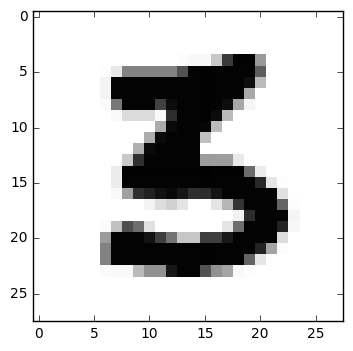

Accuracy:  0.923


In [12]:
from random import randint
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

 # MNIST data input (img shape: 28*28)
n_input = 784

# MNIST total classes (0-9 digits)
n_classes = 10


# Parameters
training_epochs = 15
batch_size = 100
display_step = 1
#learning_rate = 10
learning_rate = 0.1
#learning_rate = 0.01
#learning_rate = 0.001


X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

W = tf.Variable(tf.zeros([n_input, n_classes]))
b = tf.Variable(tf.zeros([n_classes]))

activation = tf.nn.softmax( tf.matmul(X, W) + b )
cost = tf.reduce_mean( -tf.reduce_sum(Y * tf.log(activation), reduction_indices=1) )
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

print "Training starts"

with tf.Session() as sess:
    sess.run(init)
    
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
        
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={X: batch_x, Y: batch_y})
        
            # Compute average loss
            avg_cost += sess.run(cost, feed_dict={X: batch_x, Y: batch_y}) / total_batch
        
        # Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost)
            
    print "Optimization Finished!"
    
    r = randint(0, mnist.test.num_examples -1)
    print "Label: ", sess.run( tf.argmax(mnist.test.labels[r:r+1], 1) )
    print "Prediction: ", sess.run( tf.argmax(activation, 1), feed_dict={X: mnist.test.images[r:r+1]} )
    
    plt.imshow( mnist.test.images[r:r+1].reshape(28,28), cmap='Greys', interpolation='nearest' )
    plt.show()
    
    # test model
    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(Y, 1))
    
    # calculate accuracy
    accuracy = tf.reduce_mean( tf.cast(correct_prediction, 'float') )
    print "Accuracy: ", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels})